In [4]:
# h(X) = W0 + W1.X

# Cost function to be minimized: J(W0,W1) = (1/2n).sigma((h(Xi)-Ti)^2) for all i=1 until i=n
# J(W0,W1) = error with these parameters (slope, intercept). 
# h(Xi) refers to the model’s prediction of the y-value at feature X with index i

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
%matplotlib inline
plt.rcParams['figure.figsize'] = (20.0, 10.0)



# https://mubaris.com/posts/linear-regression/

In [5]:
class LinearRegression:
    def __init__(self):
        pass
    
    def fit(self, X, y):
        self.X = X
        self.y = y
        
        mean_x = np.mean(X)
        mean_y = np.mean(y)
        
        # Calculate b0 and b1        
        numerator = sum([(X[i] - mean_x) * (y[i] - mean_y) for i in range(len(X))])
        denominator = sum([(X[i] - mean_x) ** 2 for i in range(len(X))])
        
        b1 = numerator/denominator
        b0 = mean_y - (b1 * mean_x)

        self.coefs = [b0, b1]
        
    def predict(self, X):
        y_pred = [self.coefs[0] + (self.coefs[1] * x) for x in X]
        self.y_pred = y_pred
        
        return y_pred
    
    def score(self, X, y):
        ss_t, ss_r = 0, 0

        for i in range(len(X)):
            y_pred = self.coefs[0] + self.coefs[1] * X[i]
            ss_t += (y[i] - np.mean(y)) ** 2
            ss_r += (y[i] - y_pred) ** 2
            
        r2 = 1 - (ss_r/ss_t)
        return r2
    
    def score_rmse(self, X, y):
        rmse = 0
        for i in range(len(X)):
            y_pred = self.coefs[0] + self.coefs[1] * X[i]
            rmse += (y[i] - y_pred) ** 2

        return np.sqrt(rmse/len(X))
    
    def plot_prediction(self, X, y):
        r2 = self.score(X, y)
        rmse = self.score_rmse(X, y)
        
        _x = np.linspace(np.min(X), np.max(X), 1000)
        _y = self.coefs[0] + self.coefs[1] * _x

        plt.plot(_x, _y, label='Regression Line', color='red')
        plt.scatter(X, y, label='Actual values')
        
        plt.xlabel('X-label')
        plt.ylabel('y-label')
        plt.legend()
        
        return plt.show()

In [6]:
from sklearn.model_selection import train_test_split

data = pd.read_csv('headbrain.csv')
X = data['Head Size(cm^3)'].values
y = data['Brain Weight(grams)'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(model.score(X_test, y_test))
print(model.score_rmse(X_test, y_test))

0.669249735533724
68.91317515113433


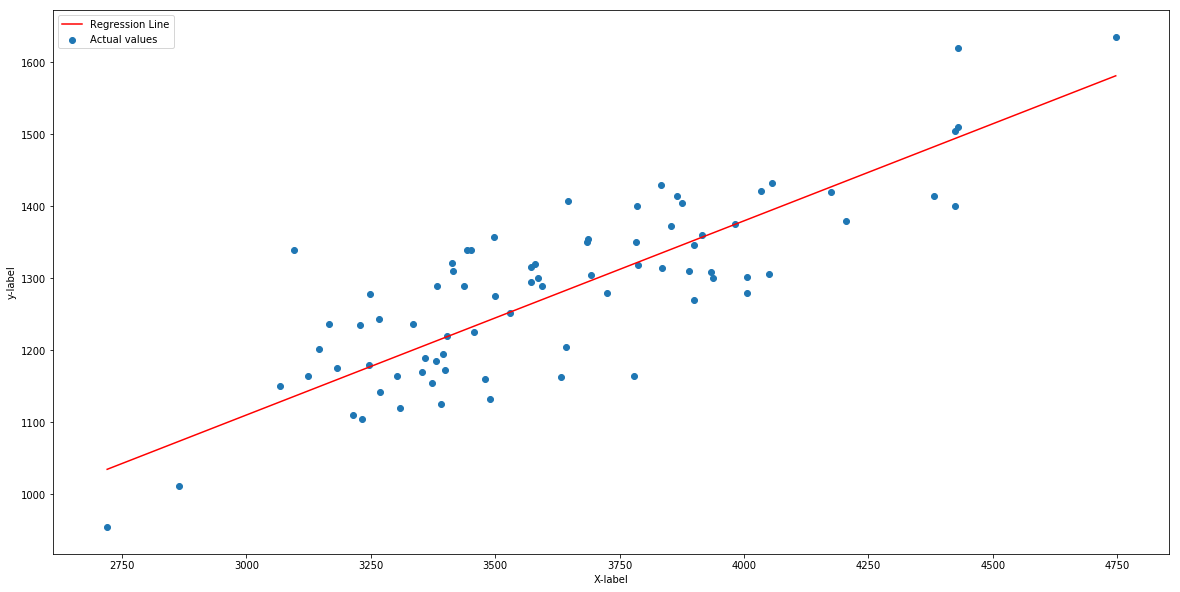

In [7]:
model.plot_prediction(X_test, y_test)